# Data Exploration

In this chapter we are going to explore the data and extract useful insights in order to increase business understanding and problem knowledge to perform better modeling.

----

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
from openpyxl import load_workbook
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
xls = pd.ExcelFile('data/Main Dataset V3.0 .xlsx')
ad_post = pd.read_excel(xls, 'Ad-Post')
ad_story = pd.read_excel(xls, 'Ad-Story')
influencer = pd.read_excel(xls, 'Influencer')
leaders_post = pd.read_excel(xls, 'Leaders-Post')
leaders_story = pd.read_excel(xls, 'Leaders-Story')
post = pd.read_excel(xls, 'Post')
story = pd.read_excel(xls, 'Story')
print('Datasets Loaded Completely.')

Datasets Loaded Completely.


In the below cells you can the top 5 row and features of prepared datasets. Please have in mind that we already tackle the problem of missing data with imputations which you can see implementation in separate file.

In [9]:
print('Advertising Posts first 5 rows:')
ad_post.head()

Advertising Posts first 5 rows:


,Unnamed: 0,ad_post_no,name,follower,field,view,cost,threshold,cost_per_view,price_difference,benefit
0,0,1,3kanstv,1000000,video,9435,1242664.83,80,754800,-487864.83,0
1,1,2,bazigaran.iraani,1700000,video,7926,1242664.83,80,634080,-608584.83,0
2,2,3,bedaanim,1700000,fact,19433,1117313.08,80,1554640,437326.92,1
3,3,4,bekhaanim,224000,art & culture,8424,484343.80,80,673920,189576.20,1
4,4,5,beyond.mag,1000000,fact,8212,966517.09,80,656960,-309557.09,0


In [10]:
print('Advertising Stories first 5 rows:')
ad_story.head()

Advertising Stories first 5 rows:


,Unnamed: 0,ad_story_no,name,field,view,threshold,follower,action,interaction,impression,cost,cost_per_view,price_difference,benefit
0,0,0,4rahesalamat,health,6260,20,686000,82,7,6374,559250.09,125200,-434050.09,0
1,1,1,90tv.official,news,58990,20,877000,234,90,58568,1302915.56,1179800,-123115.56,0
2,2,2,ancientworld1,fact,101631,20,2600000,273,218,94682,1631578.95,2032620,401041.05,1
3,3,3,ayamidooni,fact,97671,20,2300000,365,488,92023,1907421.43,1953420,45998.57,1
4,4,4,banooye_khone,women,21887,20,2400000,239,38,74414,1261832.64,437740,-824092.64,0


In [11]:
print('Minor Influencers first 5 rows:')
influencer.head()

Minor Influencers first 5 rows:


,Unnamed: 0,story_no,influ_name,gender,field,l_threshold,h_threshold,follower,view,action,impression,cta,interaction,cost,lowest_cost_per_view,highest_cost_per_view,benefit
0,0,0,ali_bakhtiarvandi,family,lifestyle,40,80,141000,3996,14,4186,0,0,502206.47,159840,319680,-1
1,1,1,ali_bakhtiarvandi,family,lifestyle,40,80,141000,3279,30,3473,1,28,502206.47,131160,262320,-1
2,2,2,ali_bakhtiarvandi,family,lifestyle,40,80,141000,3636,5,3867,0,0,502206.47,145440,290880,-1
3,3,3,ali_bakhtiarvandi,family,lifestyle,40,80,141000,3145,16,3317,1,11,502206.47,125800,251600,-1
4,4,4,ali_bakhtiarvandi,family,lifestyle,40,80,141000,3113,30,3286,1,22,502206.47,124520,249040,-1


In [12]:
print('Main influencers stories first 5 rows:')
leaders_story.head()

Main influencers stories first 5 rows:


,Unnamed: 0,story_no,name,gender,cost,follower,view,action,interaction,impression
0,0,0,aidapooryanasab,female,0,692000,103909,651,562,107902
1,1,1,alimona.trips,family,0,73400,4169,162,130,3548
2,2,2,amirparsaneshat,male,0,146000,26972,527,335,26925
3,3,3,ghonche.ostovarnia,female,0,122000,8381,205,154,8381
4,4,4,maandani,male,0,128000,10493,178,151,10952


In [13]:
print('Main influencers posts first 5 rows:')
leaders_post.head()

Main influencers posts first 5 rows:


,Unnamed: 0,post_no,name,gender,l_threshold,h_threshold,follower,view,like,comment,share,save,profile_visit,reach,impression,cost,lowest_cost_per_view,highest_cost_per_view,benefit
0,0,0,aidapooryanasab,female,250,500,692000,78137,17500,205,275,272,1374,149048,162532,41813725.49,19534250,39068500,-1
1,1,1,alimona.trips,family,250,500,73400,20220,5099,140,238,138,463,31642,38437,6968954.25,5055000,10110000,0
2,2,2,amirparsaneshat,male,250,500,146000,128378,25940,573,7732,7207,2593,146276,180104,21185620.92,32094500,64189000,1
3,3,3,ghonche.ostovarnia,female,250,500,122000,103347,12300,733,261,471,6611,156349,172354,8362745.10,25836750,51673500,1
4,4,4,maandani,male,250,500,128000,15002,2408,68,98,232,482,27562,30204,7247712.42,3750500,7501000,0


In [14]:
print('Campaing stories first 5 rows:')
story.head()

Campaing stories first 5 rows:


,Unnamed: 0,story_no,type,view,action,reply,profile_visit,share,website_click,sticker_tap,impression,follow,navigation,back,forward,next,exit,vote
0,0,0,share,1337,53,4,49,0,0,0,1380,0,1618,28,1048,179,363,0
1,1,1,share,1164,114,2,110,1,1,0,1190,1,1490,106,919,119,350,0
2,2,2,share,727,21,1,20,0,0,0,765,0,772,38,428,92,214,0
3,3,3,share,850,45,5,40,0,0,0,930,1,1038,31,531,125,351,0
4,4,4,share,1294,69,8,58,0,3,0,1384,0,1522,35,909,186,392,0


In [15]:
print('Campaign posts first 5 rows:')
post.head()

Campaign posts first 5 rows:


,Unnamed: 0,post_no,like,comment,share,save,profile_visit,reach,impression,ig_tv,view
0,0,1,2118,15636,1448,381,339,13760,16292,1,98313.00
1,1,2,611,26,44,41,112,3968,5018,0,nan
2,2,3,1408,15438,862,129,345,8157,9908,1,170437.00
3,3,4,741,566,109,68,73,4957,6024,1,2762.00
4,4,5,567,6,47,42,148,4616,5024,0,nan


first thing first, we must check how many records and features are there in our datasets.

In [16]:
print(f'There are {ad_story.shape[0]} Records and {ad_story.shape[1]} Features in Advertising Stories Dataset.')
print(f'There are {ad_post.shape[0]} Records and {ad_post.shape[1]} Features in Advertising Posts Dataset.')
print(f'There are {influencer.shape[0]} Records and {influencer.shape[1]} Features in Minor Influencers Dataset.')
print(f'There are {leaders_story.shape[0]} Records and {leaders_story.shape[1]} Features in Main Influencers Stories Dataset.')
print(f'There are {leaders_post.shape[0]} Records and {leaders_post.shape[1]} Features in Main Influencers Posts Dataset.')
print(f'There are {story.shape[0]} Records and {story.shape[1]} Features in Campaign Stories Dataset.')
print(f'There are {post.shape[0]} Records and {post.shape[1]} Features in Posts Dataset.')

There are 27 Records and 14 Features in Advertising Stories Dataset.
There are 27 Records and 11 Features in Advertising Posts Dataset.
There are 102 Records and 17 Features in Minor Influencers Dataset.
There are 12 Records and 10 Features in Main Influencers Stories Dataset.
There are 9 Records and 19 Features in Main Influencers Posts Dataset.
There are 40 Records and 18 Features in Campaign Stories Dataset.
There are 13 Records and 11 Features in Posts Dataset.


----

## Media Effectiveness Indicator

In this step we are going to implement new feature based on threshold and paid price for the media. For datasets that have a range threshold we are going to implement multi class feature for them.

It's important to have this facts in mind:
- Negative value in price difference means that specific medium charged us more than it should and positive value means that we benefitted from that medium more than we paid based on main deciding factor, which is view.
- 'Benefit' feature is a binary class which shows that we are benefitting or not.

In [17]:
ad_post['cost_per_view'] = ad_post['view'] * ad_post['threshold']
ad_post['price_difference'] = ad_post['cost_per_view'] - ad_post['cost']
ad_post['benefit'] = (ad_post['price_difference'] >= 0).astype(int)

ad_story['cost_per_view'] = ad_story['view'] * ad_story['threshold']
ad_story['price_difference'] = ad_story['cost_per_view'] - ad_story['cost']
ad_story['benefit'] = (ad_story['price_difference'] >= 0).astype(int)

influencer['lowest_cost_per_view'] = influencer['l_threshold'] * influencer['view']
influencer['highest_cost_per_view'] = influencer['h_threshold'] * influencer['view']
influencer['benefit'] = np.where(influencer['cost'] < influencer['lowest_cost_per_view'], 1, np.where(influencer['cost'] > influencer['highest_cost_per_view'], -1, 0))

leaders_post['lowest_cost_per_view'] = leaders_post['l_threshold'] * leaders_post['view']
leaders_post['highest_cost_per_view'] = leaders_post['h_threshold'] * leaders_post['view']
leaders_post['benefit'] = np.where(leaders_post['cost'] < leaders_post['lowest_cost_per_view'], 1, np.where(leaders_post['cost'] > leaders_post['highest_cost_per_view'], -1, 0))

### Overall Cost Status for Paid Media
In this section we are going to review overall status of paid media for different approaches used for this campaign.

In [18]:
print('In Advertising Posts:')
print(f'\tNumber of Benefit media: {ad_post["benefit"].value_counts()[1]}')
print(f'\tNumber of Loss media: {ad_post["benefit"].value_counts()[0]}')
print(f'\tOverall Cost: {ad_post["cost"].sum():,}')
print(f'\tActual Cost per View: {ad_post["cost_per_view"].sum():,}')
print(f'\tBenefit Amount: {ad_post["price_difference"].sum():,}')

print('\nIn Advertising Stories:')
print(f'\tNumber of Benefit media: {ad_story["benefit"].value_counts()[1]}')
print(f'\tNumber of Loss media: {ad_story["benefit"].value_counts()[0]}')
print(f'\tOverall Cost: {ad_story["cost"].sum():,}')
print(f'\tActual Cost per View: {ad_story["cost_per_view"].sum():,}')
print(f'\tBenefit Amount: {ad_story["price_difference"].sum():,}')

print('\nIn Influencers:')
print(f'\tNumber of Benefit media: {influencer["benefit"].value_counts()[1]}')
print(f'\tNumber of Neutral media: {influencer["benefit"].value_counts()[0]}')
print(f'\tNumber of Loss media: {influencer["benefit"].value_counts()[-1]}')
print(f'\tOverall Cost: {influencer["cost"].sum():,}')
print(f'\tLowest Anticipated Overall Cost: {influencer["lowest_cost_per_view"].sum():,}')
print(f'\tHighest Anticipated Overall Cost: {influencer["highest_cost_per_view"].sum():,}')
print(f'\tAverage Anticipated Overall Cost: {((influencer["highest_cost_per_view"].sum() + influencer["lowest_cost_per_view"].sum()) / 2):,}')

print('\nIn Main Influencers Posts:')
print(f'\tNumber of Benefit media: {leaders_post["benefit"].value_counts()[1]}')
print(f'\tNumber of Neutral media: {leaders_post["benefit"].value_counts()[0]}')
print(f'\tNumber of Loss media: {leaders_post["benefit"].value_counts()[-1]}')
print(f'\tOverall Cost: {leaders_post["cost"].sum():,}')
print(f'\tLowest Anticipated Overall Cost: {leaders_post["lowest_cost_per_view"].sum():,}')
print(f'\tHighest Anticipated Overall Cost: {leaders_post["highest_cost_per_view"].sum():,}')
print(f'\tAverage Anticipated Overall Cost: {((leaders_post["highest_cost_per_view"].sum() + leaders_post["lowest_cost_per_view"].sum()) / 2):,}')

In Advertising Posts:
	Number of Benefit media: 15
	Number of Loss media: 12
	Overall Cost: 39,999,999.99999991
	Actual Cost per View: 40,289,360
	Benefit Amount: 289,360.0000000859

In Advertising Stories:
	Number of Benefit media: 16
	Number of Loss media: 11
	Overall Cost: 30,999,999.99999996
	Actual Cost per View: 29,916,500
	Benefit Amount: -1,083,499.9999999602

In Influencers:
	Number of Benefit media: 36
	Number of Neutral media: 43
	Number of Loss media: 23
	Overall Cost: 78,399,999.99999984
	Lowest Anticipated Overall Cost: 89,208,000
	Highest Anticipated Overall Cost: 178,416,000
	Average Anticipated Overall Cost: 133,812,000.0

In Main Influencers Posts:
	Number of Benefit media: 2
	Number of Neutral media: 5
	Number of Loss media: 2
	Overall Cost: 170,599,999.99999967
	Lowest Anticipated Overall Cost: 126,810,500
	Highest Anticipated Overall Cost: 253,621,000
	Average Anticipated Overall Cost: 190,215,750.0


A very interesting insight that can be get from this exploration is that the threshold for influencers are not set correctly. Agency charged customer less than the anticipated price for this number of views.

----

### Descriptive Analysis of Datasets

In this part we are going to check the descriptive analysis of datasets and their scatter matrix among every single feature.

#### Advertising Posts:

In [19]:
ad_post.describe()

,Unnamed: 0,ad_post_no,follower,view,cost,threshold,cost_per_view,price_difference,benefit
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,13.00,14.00,1337814.81,18652.48,1481481.48,80.00,1492198.52,10717.04,0.56
std,7.94,7.94,1112368.09,12119.83,1290670.47,0.00,969586.48,610319.73,0.51
min,0.00,1.00,153000.00,4808.00,346156.71,80.00,384640.00,-1996407.04,0.00
25%,6.50,7.50,359500.00,9581.00,650347.26,80.00,766480.00,-298991.51,0.00
50%,13.00,14.00,1100000.00,14744.00,1117313.08,80.00,1179520.00,189576.20,1.00
75%,19.50,20.50,2050000.00,22814.50,1491197.79,80.00,1825160.00,392976.64,1.00
max,26.00,27.00,4500000.00,46340.00,5246807.04,80.00,3707200.00,934848.80,1.00


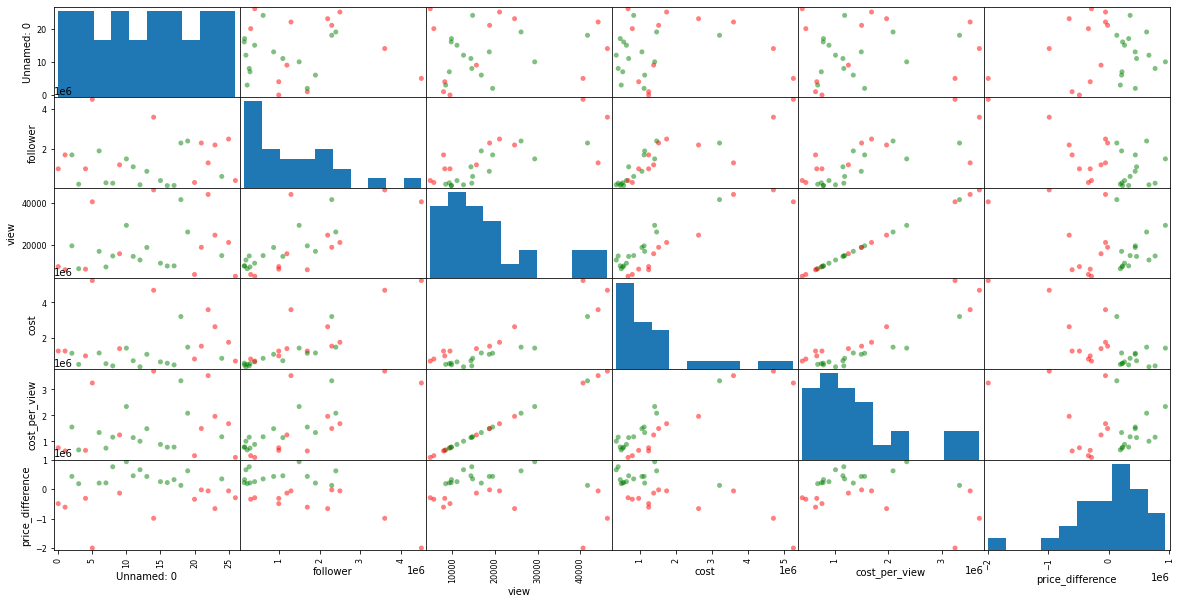

In [22]:
pd.plotting.scatter_matrix(ad_post.drop(['ad_post_no', 'threshold', 'benefit'], axis=1), figsize=(20,10), s=100,
                          c = np.where(ad_post['benefit'] == 1, 'green', 'red'))
plt.ticklabel_format(useOffset=False)
plt.show()

#### Advertising Stories:

In [ ]:
ad_story.describe()

In [ ]:
pd.plotting.scatter_matrix(ad_story.drop(['ad_story_no', 'threshold', 'benefit'], axis=1), figsize=(20,10), s=100,
                           c = np.where(ad_story['benefit'] == 1, 'green', 'red'))
plt.show()

#### Minor Influencers:

In [ ]:
influencer.describe()

In [ ]:
pd.plotting.scatter_matrix(influencer.drop(['story_no', 'l_threshold', 'benefit', 'h_threshold', 'cta'], axis=1), figsize=(20,10), s=100,
                          c=np.where(influencer['benefit'] == 1, 'green', np.where(influencer['benefit'] == -1, 'red', 'gold')))
plt.show()

#### Major Influencers Advertising Posts:

In [ ]:
leaders_post.describe()

In [ ]:
pd.plotting.scatter_matrix(leaders_post.drop(['post_no', 'l_threshold', 'benefit', 'h_threshold'], axis=1), figsize=(30,20), s=100,
                          c=np.where(leaders_post['benefit'] == 1, 'green', np.where(leaders_post['benefit'] == -1, 'red', 'gold')))
plt.show()

#### Major Influencers Advertising Stories:

In [ ]:
leaders_story.describe()

In [ ]:
pd.plotting.scatter_matrix(leaders_story.drop(['story_no', 'cost'], axis=1), figsize=(20,10), s=100)
plt.show()

#### Campaign Posts:

In [ ]:
post.describe()

In [ ]:
pd.plotting.scatter_matrix(post.drop(['post_no', 'ig_tv'], axis=1), figsize=(20,10), s=100)
plt.show()

#### Campaign Story:

In [ ]:
story.describe()

In [ ]:
pd.plotting.scatter_matrix(story.drop(['story_no'], axis=1), figsize=(40,20), s=100)
plt.show()

----

### Data Exploration:

In this step we are going to explore the data and extract some insights from it.

In [ ]:
plt.figure(figsize=(5,5), dpi=90)
g = sns.countplot(x="benefit", data = ad_post, dodge = False, hue='benefit')
h,l = g.get_legend_handles_labels()
labels=['Loss Media','Benefit Media']
g.legend(h,labels,title="Status", loc="upper left") 
plt.title('Loss vs Benefit - Advertising Posts')
plt.show()

count_benefit = len(ad_post[ad_post['benefit'] == 1])
count_loss = len(ad_post[ad_post['benefit'] == 0])
print(f'The number of benefit media are: {count_benefit}.')
print(f'The number of loss media are: {count_loss}.')

In [ ]:
plt.figure(figsize=(5,5), dpi=90)
g = sns.countplot(x="benefit", data = ad_story, dodge = False, hue='benefit')
h,l = g.get_legend_handles_labels()
labels=['Loss Media','Benefit Media']
g.legend(h,labels,title="Status", loc="upper left") 
plt.title('Loss vs Benefit - Advertising Stories')
plt.show()

count_benefit = len(ad_story[ad_story['benefit'] == 1])
count_loss = len(ad_story[ad_story['benefit'] == 0])
print(f'The number of benefit media are: {count_benefit}.')
print(f'The number of loss media are: {count_loss}.')

In [ ]:
plt.figure(figsize=(6,5), dpi=90)
g = sns.countplot(x="benefit", data = influencer, dodge = False, hue='benefit')
h,l = g.get_legend_handles_labels()
labels=['Loss Media','Neutral Media', 'Benefit Media']
g.legend(h,labels,title="Status", loc="upper left") 
plt.title('Loss vs Benefit - Minor Influencers')
plt.show()

count_benefit = len(influencer[influencer['benefit'] == 1])
count_loss = len(influencer[influencer['benefit'] == -1])
count_neutral = len(influencer[influencer['benefit'] == 0])
print(f'The number of benefit media are: {count_benefit}.')
print(f'The number of loss media are: {count_loss}.')
print(f'The number of neutral media are: {count_neutral}.')

In [ ]:
plt.figure(figsize=(6,5), dpi=90)
g = sns.countplot(x="benefit", data = leaders_post, dodge = False, hue='benefit')
h,l = g.get_legend_handles_labels()
labels=['Loss Media','Neutral Media', 'Benefit Media']
g.legend(h,labels,title="Status", loc="upper left") 
plt.title('Loss vs Benefit - Main Influencers Posts')
plt.show()

count_benefit = len(leaders_post[leaders_post['benefit'] == 1])
count_loss = len(leaders_post[leaders_post['benefit'] == -1])
count_neutral = len(leaders_post[leaders_post['benefit'] == 0])
print(f'The number of benefit media are: {count_benefit}.')
print(f'The number of loss media are: {count_loss}.')
print(f'The number of neutral media are: {count_neutral}.')

----
### Price Difference among advertising approaches diverging plot and Anticipated Cost vs Actual cost in Minor and Major Influencers

In [ ]:
temp_df = ad_post.sort_values('price_difference')
temp_df.reset_index(inplace = True)
colors = []
for x in temp_df['price_difference']:
    if x < 0:
        colors.append('red')
    elif x > 0:
        colors.append('green')
    else:
        colors.append('goldenrod')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()
ax.hlines(y = temp_df.index, xmin = 0 , color = colors,  xmax = temp_df['price_difference'], linewidth = 1)
for x, y in zip(temp_df['price_difference'], temp_df['name']):
    c = None
    if x < 0:
        c = 'red'
    elif x > 0:
        c = 'green'
    else:
        c = 'goldenrod' 
    ax.text(x - 15000 if x < 0 else x + 15000, 
             y, 
             round(x, 2), 
             color = c,  
             horizontalalignment='right' if x < 0 else 'left', 
             size = 10)
    ax.scatter(x, 
                y, 
                color = c, 
                alpha = 0.5)
ax.set_title("Price Difference in Advertising Posts Diverging plots")
ax.set_xlim(-2_300_000)
ax.set_xlabel("Price Difference")
ax.set_ylabel("Page")
ax.grid(linestyle='--', alpha=0.5)
ax.set_yticks(temp_df.index)
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines['right'].set_position(('data',0))
ax.spines['right'].set_color('black')
plt.show()

In [ ]:
temp_df = ad_story.sort_values('price_difference')
temp_df.reset_index(inplace = True)
colors = []
for x in temp_df['price_difference']:
    if x < 0:
        colors.append('red')
    elif x > 0:
        colors.append('green')
    else:
        colors.append('goldenrod')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()
ax.hlines(y = temp_df.index, xmin = 0 , color = colors,  xmax = temp_df['price_difference'], linewidth = 1)
for x, y in zip(temp_df['price_difference'], temp_df['name']):
    c = None
    if x < 0:
        c = 'red'
    elif x > 0:
        c = 'green'
    else:
        c = 'goldenrod' 
    ax.text(x - 10000 if x < 0 else x + 10000, 
             y, 
             round(x, 2), 
             color = c,  
             horizontalalignment='right' if x < 0 else 'left', 
             size = 10)
    ax.scatter(x, 
                y, 
                color = c, 
                alpha = 0.5)
ax.set_title("Price Difference in Advertising Stories Diverging plots")
ax.set_xlim(-1_300_000)
ax.set_xlabel("Price Difference")
ax.set_ylabel("Page")
ax.grid(linestyle='--', alpha=0.5)
ax.set_yticks(temp_df.index)
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines['right'].set_position(('data',0))
ax.spines['right'].set_color('black')
plt.show()

In [ ]:
x1 = influencer['lowest_cost_per_view']
x2 = influencer['highest_cost_per_view']
y = influencer['influ_name']
z = influencer['benefit']
c = influencer['cost']

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot()

for x1_, x2_, y_, z_, c_ in zip(x1, x2, y, z, c):
    ax.plot([int(x1_), int(x2_)], [y_, y_], color = "red" if z_ == -1 else "green" if z_ == 1 else 'gold', linewidth=5, alpha=.11)
    ax.scatter(c_, y_, s=20, marker='v', c="darkred" if z_ == -1 else "darkgreen" if z_ == 1 else 'goldenrod')

ax.grid(linestyle='--', alpha=0.5)
ax.set_title('Each Minor Influencer Anticipated Cost and Actual Cost')
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylabel('Influencer Name')
ax.set_xlabel('Price in Millions')
plt.show()

In the Graph above you can see each minor influencer lowest and highest anticipated cost as a bar and their actual cost as triangle. with quick glimpse we can deduce that:
- The distance between highest anticipated cost and actual cost for not benefitted influencers are not very far, the most over paid influencer is "mahshidseydi".
- the distance between lowest anticipated cost and actual cost for benefitted influencers are far and thats good sign, the most under paid influencers are "ayrosmelody" and in second place is "azarmahisefat".

In [ ]:
x1 = leaders_post['lowest_cost_per_view']
x2 = leaders_post['highest_cost_per_view']
y = leaders_post['name']
z = leaders_post['benefit']
c = leaders_post['cost']

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()

for x1_, x2_, y_, z_, c_ in zip(x1, x2, y, z, c):
    ax.plot([int(x1_), int(x2_)], [y_, y_], color = "red" if z_ == -1 else "green" if z_ == 1 else 'gold', linewidth=5, alpha=.6)
    ax.scatter(c_, y_, s=20, marker='v', c="darkred" if z_ == -1 else "darkgreen" if z_ == 1 else 'darkorange')
    

ax.grid(linestyle='--', alpha=0.5)
ax.set_title('Each Major Influencer Post Anticipated Cost and Actual Cost')
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylabel('Influencer Name')
ax.set_xlabel('Price in Millions')
plt.show()

In the Graph above you can see each major influencer lowest and highest anticipated cost as a bar and their actual cost as triangle. with quick glimpse we can deduce that:
- There are only 1 influencer which was overpaid, the distance between its cost and highest anticipated value are high. It's advised to review the price and further project with "shahabjafarnejad".
- There are 2 influencer which was underpaid and the distance between their actual cost and lowest anticipated value are far and that's a good sign. These influencers are "amirparsaneshat" and "ghonche.ostovarnia".
- The 2 underpaid influencer are the main reason that this approach was benefitted for the agency.

In [ ]:
ad_post.drop(columns = ['ad_post_no', 'threshold']).groupby('benefit').mean()

In the cell above you can see the advertising post media grouped by their benefit status, based on that information we can deduce that:
- benefit media had less followers but they actually brought more views in contrast of non-benefit media.
- price difference between benefit and non-benefit media are significant.
- high follower media tend to charge more but their view amounts are not correlated with their followers and thats a sign of fake followers.

In [ ]:
ad_story.drop(columns = ['ad_story_no', 'threshold']).groupby('benefit').mean()

In the cell above you can see the advertising story media grouped by their benefit status, based on that information we can deduce that:
- the difference between the mean value of benefit and non-benefit media followers are 100k.
- although the non-benefit media got more impressions that benefit ones, benefit media got more views, almost 33% more.
- the difference between the prices are not very significant.

In [ ]:
influencer.drop(columns = ['story_no']).groupby('benefit').mean()

In the cell above you can see the minor influencers grouped by their benefit status, based on that information we can deduce that:
- more followers in minor influencers means the higher chance of being benefitted. this fact can be interpreted as selected influencers had almost no fake followers and their view counts are organic.
- high follower influeners got more action percentage regarding their story than low followers infuencers. This means that followers of high follower influencers engage more with their story. this fact should be in mind when proposing action-based campaign to customers.

In [ ]:
leaders_post.drop(columns = ['post_no', 'l_threshold', 'h_threshold']).groupby('benefit').mean()

In the cell above you can see the major influencers grouped by their benefit status, based on that information we can deduce that:
- the deciding factor regarding the benefit are view, thus performance metric which are corrolated with view are important. we can vaguly see this effect in benefit and neutral media.
- as you can see benefit and neutral media are rich in performance metrics.
- as we said earlier, the only major influencer which was not benefit and overpaid is "shahabjafarnejad". 

In [ ]:
intercor = ad_post.drop(columns = ['ad_post_no', 'threshold']).corr()
plt.figure(figsize=(10,7))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Advertising Media Posts Correlation Heat Map')
plt.show()

In the Graph above you can see the feature correlation heatmap for advertising media posts, based on that there are some worth mentioning insights:
- the strongest correlation is between "cost per view" and "view", it's obvious since cost per view is calculated by view.
- second strongest correlation are for "cost per view" and "cost" and "cost" and "view". since view is our main performance metric and cost is a important feature we are trying to optimize.
- the correlation between cost and follower are more than view and follower. this means that in order to make our media optimized cost-wise we must focus on view more than follower.

In [ ]:
intercor = ad_story.drop(columns = ['ad_story_no', 'threshold']).corr()
plt.figure(figsize=(10,7))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Advertising Media Stories Correlation Heat Map')
plt.show()

In the graph above you can see the feature correlation heatmap for advertising media stories, some interesting insights:
- view is strongly correlated with action, interaction, impression and improtantly, cost and cost per view.
- although view and follower are correlated positevly, their relationship strength is less than forementioned features.
- follower and impression are very strongly correlated in stories.
- although action and impression are strongly correlated with cost, interaction are less correlated. this means that other actions except sticker tap are far more important for a story to be estimated costly benefical.
- follower and interaction are not correlated very strongly. this suggest that the increase of followers are not linearly affect interaction quantity, so if we are performing a interaction-based campaign, it's wise to consider medium and low media since their followers are interacting partially more.

In [ ]:
intercor = influencer.drop(columns = ['story_no', 'l_threshold', 'h_threshold']).corr()
plt.figure(figsize=(15,10))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Influencer Stories Correlation Heat Map')
plt.show()

In the cell above you can see the features correlation heatmap of minor influencers. almost the same insight as advertising stories can be deduced from this heatmap.

In [ ]:
intercor = leaders_post.drop(columns = ['post_no', 'l_threshold', 'h_threshold']).corr()
plt.figure(figsize=(15,10))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Major Influencers Posts Correlation Heat Map')
plt.show()

In the cell above you can see the feature correlation heatmap for Major influencers advertising posts. some interesting insights from this graph are:
- there is strong positive between share and save. this could be interpreted as almost everyone who shared their post, also saved their post too.
- major influencers cost are strongly correlated to their quantity of followers and far less dependent to their view. this means that we should be looking precisely to their view count when we are selecting influencers, not their followers.
- in video type contents, there are strong correlation between view and like. this can be interpreted as whoever watches a video in influencers page, like that video too.
- follower correlation with comment, share, save and profile visit are negative. this can be interpreted as the more follower an influencer get, the less engagement he/she will get from their follower. also this can be a sign of a passive/fake followers for influencers.

In [ ]:
intercor = leaders_story.drop(columns = ['story_no', 'cost']).corr()
plt.figure(figsize=(10,7))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Major Influencers Story Correlation Heat Map')
plt.show()

In the cell above you can see the correlation heatmap for Major influencers advertising story contents, some interesting insights from this data are:
- view and follower are strongly correlated, this means that almost the good amount of major influencers followers watch their stories. also this fact should be taken in mind when the goal of a campaign is awareness.
- action and follower are mediocore strength-wise. this means that followers engage with influencers content type, but when proposing action-based campaign should be take in mind that it's probably need a lot of influencers.

In [ ]:
intercor = story.drop(columns = ['story_no']).corr()
plt.figure(figsize=(15,10))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Stories Correlation Heat Map')
plt.show()

In the cell above you can see the feature correlation heatmap for stories, some interesting insights are:
- majority of actions in instagram stories are sticker taps. this means that putting tappable stickers in stories always attract the majority of actions for a story.
- on the other hand, correlation between action and view are at 0.25. this indicates that people are not very interacting with stories if we are using this approach.
- as you can see influencers' followers have more action with influencers' stories than campaign page stories. we must take follower quantity in mind but generally when we are proposing action-based campaigns, it's better to invest in influencers.
- majority quantity of navigation comes from forward and in the second plance, exit.
- people who vote in instagram stories are more likely to push to next story than just wait for story time to finish.

In [ ]:
intercor = post.drop(columns = ['post_no', 'ig_tv']).corr()
plt.figure(figsize=(10,7))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Post Correlation Heat Map')
plt.show()

In the cell above you can see the correlation heatmap for posts, since we have just 12 posts is not very accurate, but it will we worthy to have glimpse at the result.

In [ ]:
ad_post.drop(columns = ['ad_post_no', 'threshold']).groupby('field').mean()

The table above is the mean of features grouped by field in advertising posts. we can deduce from that information:
- fact media has most followers and in the second place women field.
- although fact media cost twice as much women field, their view difference are not significant. 
- although video field has significant followers, but their view are fairly low, this could be interpreted as fake/passive followers.

In [ ]:
d = ad_post['field'].value_counts().to_dict()
colors = ['blue', 'green', 'red', 'orange']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.bar(d.keys(), d.values(), color = colors)
for i, (k, v) in enumerate(d.items()):
    ax.text(k,
            v + .5,
            v,
            color = colors[i],
            fontsize = 10,
            horizontalalignment = 'center',
            verticalalignment = 'center')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylim(0, 13)
ax.set_title("Number of Advertising Posts fields Per advertising media", fontsize = 14);
plt.show()

total = sum(ad_post['field'].value_counts())
print('the top 3 field in advertising posts and their percentages are:')
print(f'1. "{list(d.keys())[0]}": {(ad_post["field"].value_counts()[0]) / total * 100} %')
print(f'2. "{list(d.keys())[1]}": {(ad_post["field"].value_counts()[1]) / total * 100} %')
print(f'3. "{list(d.keys())[2]}": {(ad_post["field"].value_counts()[2]) / total * 100} %')

In [ ]:
ad_story.drop(columns = ['ad_story_no', 'threshold']).groupby('field').mean()

The table above is the mean of features grouped by field in advertising stories. some interesting facts from this table is:
- fact category got more followers and view than other categories.
- although video category is not top 3 in view, but it got significant amount of interactions. this means that this type of medium is good for action-based campaigns.
- news category despite being with the least follower among other categories, it got more view than other type of media except fact.

In [ ]:
d = ad_story['field'].value_counts().to_dict()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray', 'brown']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.bar(d.keys(), d.values(), color = colors)
for i, (k, v) in enumerate(d.items()):
    ax.text(k,
            v + .5,
            v,
            color = colors[i],
            fontsize = 10,
            horizontalalignment = 'center',
            verticalalignment = 'center')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylim(0, 12)
ax.set_title("Number of Advertising Stories fields Per advertising media", fontsize = 14);
plt.show()

total = sum(ad_story['field'].value_counts())
print('the top 3 fields in advertising stories and their percentages are:')
print(f'1. "{list(d.keys())[0]}": {(ad_story["field"].value_counts()[0]) / total * 100} %')
print(f'2. "{list(d.keys())[1]}": {(ad_story["field"].value_counts()[1]) / total * 100} %')
print(f'3. "{list(d.keys())[2]}": {(ad_story["field"].value_counts()[2]) / total * 100} %')

In [ ]:
influencer.drop(columns = ['story_no', 'l_threshold', 'h_threshold']).groupby('field').mean()

The table above is the mean of features grouped by field in minor influencers advertising, intersting insights are listed as below:
- lifestyle category despite having less than half o cooking category followers, it go almost the same amount of action and interaction. important thing to remember when designing action-based campaigns. 
- the best performing category is for cooking. please have in mind that we only had 1 influencer in this category.
- sport category despite having not the least amount of follower, but this category performed worst. please have in mind that we only had 1 influencer in this category.

In [ ]:
d = influencer['field'].value_counts().to_dict()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray', 'brown']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.bar(d.keys(), d.values(), color = colors)
for i, (k, v) in enumerate(d.items()):
    ax.text(k,
            v + 2,
            v,
            color = colors[i],
            fontsize = 10,
            horizontalalignment = 'center',
            verticalalignment = 'center')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
# ax.set_ylim(0, 70)
ax.set_title("Number of Influencer fields Per advertising media", fontsize = 14);
plt.show()

total = sum(influencer['field'].value_counts())
print('the top 3 fields in minor influencers and their percentages are:')
print(f'1. "{list(d.keys())[0]}": {(influencer["field"].value_counts()[0]) / total * 100} %')
print(f'2. "{list(d.keys())[1]}": {(influencer["field"].value_counts()[1]) / total * 100} %')
print(f'3. "{list(d.keys())[2]}": {(influencer["field"].value_counts()[2]) / total * 100} %')

In [ ]:
influencer.drop(columns = ['story_no', 'l_threshold', 'h_threshold']).groupby('gender').mean()

The table above is the mean of features grouped by gender in minor influencers advertising, intersting insights are listed as below:
- best performing category is for family, in the second spot, females and in the last spot males.
- male category despite of having less follower and views, got almost the same amount of action in contrast of female category, and more interaction than female category.
- male category generally was not benefitual but the female and family category was generally benefitual at this campaign.

In [ ]:
d = influencer['gender'].value_counts().to_dict()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray', 'brown']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.bar(d.keys(), d.values(), color = colors)
for i, (k, v) in enumerate(d.items()):
    ax.text(k,
            v + 2,
            v,
            color = colors[i],
            fontsize = 10,
            horizontalalignment = 'center',
            verticalalignment = 'center')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylim(0, 50)
ax.set_title("Number of Influencer genders Per advertising media", fontsize = 14);
plt.show()

total = sum(influencer['gender'].value_counts())
print('the top 3 genders in minor influencers and their percentages are:')
print(f'1. "{list(d.keys())[0]}": {(influencer["gender"].value_counts()[0]) / total * 100} %')
print(f'2. "{list(d.keys())[1]}": {(influencer["gender"].value_counts()[1]) / total * 100} %')
print(f'3. "{list(d.keys())[2]}": {(influencer["gender"].value_counts()[2]) / total * 100} %')

In [ ]:
leaders_post.drop(columns = ['post_no', 'l_threshold', 'h_threshold']).groupby('gender').mean()

The table above is the mean of features groued by gender in Major influencers advertising posts. interesting insights are listed below:
- the best performing group of major influencers was female and in the second place male and in the last spot family.
- male group despite being in second spot got a significant amount share and save in contrast of other categories.
- the only group that the mean of their benefit status was positive, is female and the two other categories are neutral in benefit feature.

In [ ]:
d = leaders_post['gender'].value_counts().to_dict()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray', 'brown']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.bar(d.keys(), d.values(), color = colors)
for i, (k, v) in enumerate(d.items()):
    ax.text(k,
            v + .4,
            v,
            color = colors[i],
            fontsize = 10,
            horizontalalignment = 'center',
            verticalalignment = 'center')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylim(0, 5.5)
ax.set_title("Number of Major influencers genders posts Per advertising media", fontsize = 14);
plt.show()

total = sum(leaders_post['gender'].value_counts())
print('the top 3 genders in major influencers advertising posts and their percentages are:')
print(f'1. "{list(d.keys())[0]}": {(leaders_post["gender"].value_counts()[0]) / total * 100} %')
print(f'2. "{list(d.keys())[1]}": {(leaders_post["gender"].value_counts()[1]) / total * 100} %')
print(f'3. "{list(d.keys())[2]}": {(leaders_post["gender"].value_counts()[2]) / total * 100} %')

In [ ]:
leaders_story.drop(columns = ['story_no', 'cost']).groupby('gender').mean()

In [ ]:
d = leaders_story['gender'].value_counts().to_dict()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray', 'brown']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.bar(d.keys(), d.values(), color = colors)
for i, (k, v) in enumerate(d.items()):
    ax.text(k,
            v + .2,
            v,
            color = colors[i],
            fontsize = 10,
            horizontalalignment = 'center',
            verticalalignment = 'center')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylim(0, 5.5)
ax.set_title("Number of Major influencers genders stories Per advertising media", fontsize = 14);
plt.show()

total = sum(leaders_story['gender'].value_counts())
print('the top 3 genders in major influencers advertising posts and their percentages are:')
print(f'1. "{list(d.keys())[0]}": {(leaders_story["gender"].value_counts()[0]) / total * 100} %')
print(f'2. "{list(d.keys())[1]}": {(leaders_story["gender"].value_counts()[1]) / total * 100} %')
print(f'3. "{list(d.keys())[2]}": {(leaders_story["gender"].value_counts()[2]) / total * 100} %')

In the table above you can see the mean of features grouped by gender in major infuencers advertising stories. interesting insights are listed below:
- female category was the best performing category and in the second spot male and in the last spot family.
- other performance metric features are fairly similar and anticipated.

In [ ]:
story.drop(columns = ['story_no']).groupby('type').mean()

In the table above you can see the mean of features grouped by their type in campaign published stories. some interesting insights:
- poll category got the most view and contest and share categories in the next spots.
- contest type stories got much more action in contrast of other categories.
- contest type stories shared much more than other type of stories.

In [ ]:
d = story['type'].value_counts().to_dict()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray', 'brown']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.bar(d.keys(), d.values(), color = colors)
for i, (k, v) in enumerate(d.items()):
    ax.text(k,
            v + .7,
            v,
            color = colors[i],
            fontsize = 10,
            horizontalalignment = 'center',
            verticalalignment = 'center')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylim(0, 31)
ax.set_title("Number of stories type Per advertising media", fontsize = 14);
plt.show()

total = sum(story['type'].value_counts())
print('the top 3 types in campaign published stories and their percentages are:')
print(f'1. "{list(d.keys())[0]}": {(story["type"].value_counts()[0]) / total * 100} %')
print(f'2. "{list(d.keys())[1]}": {(story["type"].value_counts()[1]) / total * 100} %')
print(f'3. "{list(d.keys())[2]}": {(story["type"].value_counts()[2]) / total * 100} %')

In [ ]:
post.drop(columns = ['post_no']).groupby('ig_tv').mean()

In the table above you can see the mean of features grouped by their bein ig_tv or not in campaign published posts. as it's obvious ig_tv posts got much more love from followers.

In [ ]:
d = post['ig_tv'].value_counts().to_dict()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray', 'brown']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.bar(d.keys(), d.values(), color = colors)
for i, (k, v) in enumerate(d.items()):
    ax.text(k,
            v + .5,
            v,
            color = colors[i],
            fontsize = 10,
            horizontalalignment = 'center',
            verticalalignment = 'center')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylim(0, 12)
ax.set_title("Number of post being ig tv or not Per advertising media", fontsize = 14);
plt.show()

total = sum(post['ig_tv'].value_counts())
print('the 2 post being ig tv or not in campaign published posts and their percentages are:')
print(f'1. "{list(d.keys())[0]}": {(post["ig_tv"].value_counts()[0]) / total * 100} %')
print(f'2. "{list(d.keys())[1]}": {(post["ig_tv"].value_counts()[1]) / total * 100} %')

In [ ]:
temp_df = ad_post[['name', 'view', 'benefit']].sort_values('view')
x = temp_df['name']
y = temp_df['view']
z = temp_df['benefit']

fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot()

for x_, y_, z_ in zip(x, y, z):
    ax.bar(x_, y_, color = "red" if z_ == 0 else "green", alpha = .3)
    ax.text(x_, y_ + 500, round(y_, 1), horizontalalignment = 'center')

ax.set_xticklabels(x, rotation=90)
ax.set_ylabel("View")
ax.set_title("Bar Chart for View per Medium in Advertising Posts");
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
red_patch = patches.Patch(color='red', alpha = .5, label='non-Benefit')
green_patch = patches.Patch(color='green', alpha = .5, label='Benefit')
plt.legend(handles=[green_patch, red_patch])
plt.show()

as you can see in the graph above, the ability of getting huge amount of views are used by media owners to push their advertising price to a state that ad wont't be beneficial cost-wise for agency.

In [ ]:
temp_df = ad_post[['name', 'follower', 'benefit']].sort_values('follower')
x = temp_df['name']
y = temp_df['follower']
z = temp_df['benefit']

fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot()

for x_, y_, z_ in zip(x, y, z):
    ax.bar(x_, y_, color = "red" if z_ == 0 else "green", alpha = .3)
    ax.text(x_, y_ + 25_000, round(y_, 1), horizontalalignment = 'center')

ax.set_xticklabels(x, rotation=90)
ax.set_ylabel("follower")
ax.set_title("Bar Chart for follower per Medium in Advertising Posts");
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
red_patch = patches.Patch(color='red', alpha = .5, label='non-Benefit')
green_patch = patches.Patch(color='green', alpha = .5, label='Benefit')
plt.legend(handles=[green_patch, red_patch])
plt.show()

as you can see in the graph above, with proper pricing, both high follower and low followers media could be beneficial.

In [ ]:
temp_df = ad_story[['name', 'view', 'benefit']].sort_values('view')
x = temp_df['name']
y = temp_df['view']
z = temp_df['benefit']

fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot()

for x_, y_, z_ in zip(x, y, z):
    ax.bar(x_, y_, color = "red" if z_ == 0 else "green", alpha = .3)
    ax.text(x_, y_ + 1_500, round(y_, 1), horizontalalignment = 'center')

ax.set_xticklabels(x, rotation=90)
ax.set_ylabel("view")
ax.set_title("Bar Chart for view per Medium in Advertising Stories");
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
red_patch = patches.Patch(color='red', alpha = .5, label='non-Benefit')
green_patch = patches.Patch(color='green', alpha = .5, label='Benefit')
plt.legend(handles=[green_patch, red_patch])
plt.show()

In the graph above you can see the view per medium in advertising stories. almost the same conclusion from advertising posts can be drawn from this graph too.

In [ ]:
temp_df = ad_story[['name', 'interaction', 'benefit']].sort_values('interaction')
x = temp_df['name']
y = temp_df['interaction']
z = temp_df['benefit']

fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot()

for x_, y_, z_ in zip(x, y, z):
    ax.bar(x_, y_, color = "red" if z_ == 0 else "green", alpha = .3)
    ax.text(x_, y_ + 10, round(y_, 1), horizontalalignment = 'center')

plt.xticks(rotation = 90)
ax.set_ylabel("Interaction")
ax.set_title("Bar Chart for interaction per Medium in Advertising Stories");
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
red_patch = patches.Patch(color='red', alpha = .5, label='non-Benefit')
green_patch = patches.Patch(color='green', alpha = .5, label='Benefit')
plt.legend(handles=[green_patch, red_patch])
plt.show()

In the graph above you can see the bar chart of interaction per medium for advertising stories. although danestani_rooz medium got the most views but its interaction rate are fairly low in contrast of picopry and picoplay.

In [ ]:
temp_df = influencer[['story_no', 'influ_name', 'view', 'benefit']].sort_values('view')
x = temp_df['influ_name'] + ' ' + temp_df['story_no'].astype(str)
y = temp_df['view']
z = temp_df['benefit']

fig = plt.figure(figsize = (85, 15))
ax = fig.add_subplot()

for x_, y_, z_ in zip(x, y, z):
    ax.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax.text(x_, y_ + 1_500, round(y_, 1), horizontalalignment = 'center')

plt.xticks(rotation = 90)
ax.set_ylabel("view")
ax.set_title("Bar Chart for view per Medium in Minor Influencers");
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
red_patch = patches.Patch(color='red', alpha = .5, label='non-Benefit')
green_patch = patches.Patch(color='green', alpha = .5, label='Benefit')
gold_patch = patches.Patch(color='gold', alpha = .5, label='Neutral')
plt.legend(handles=[green_patch, gold_patch, red_patch])
plt.show()

In the graph above you can see the bar chart of view per medium in minor influencers. it's worth to mentions:
- this campaign influencer selection was very percise and you can obviously see the gradual growth of their view is smooth.
- ayrosmelody performance was amazing regarding its cost, it's worthy to have her in mind for other campaign since her is very beneficial with current price.

In [ ]:
temp_df = influencer[['story_no', 'influ_name', 'follower', 'benefit']].sort_values('follower')
x = temp_df['influ_name'] + ' ' + temp_df['story_no'].astype(str)
y = temp_df['follower']
z = temp_df['benefit']

fig = plt.figure(figsize = (85, 15))
ax = fig.add_subplot()

for x_, y_, z_ in zip(x, y, z):
    ax.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax.text(x_, y_ + 1_500, round(y_, 1), horizontalalignment = 'center')

plt.xticks(rotation = 90)
ax.set_ylabel("follower")
ax.set_title("Bar Chart for follower per Medium in Minor Influencers");
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
red_patch = patches.Patch(color='red', alpha = .5, label='non-Benefit')
green_patch = patches.Patch(color='green', alpha = .5, label='Benefit')
gold_patch = patches.Patch(color='gold', alpha = .5, label='Neutral')
plt.legend(handles=[green_patch, gold_patch, red_patch])
plt.show()

In the graph above you can see the bar chart of follower per medium in minor influencers. as we said earlier the selection of influencers was very good so we can see an even distribution of high-low to high-medium influencers was used in this campaign.

In [ ]:
fig = plt.figure(figsize = (24, 22))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)
fig.tight_layout(h_pad = 12, w_pad = 4)
red_patch = patches.Patch(color='red', alpha = .5, label='non-Benefit')
green_patch = patches.Patch(color='green', alpha = .5, label='Benefit')
gold_patch = patches.Patch(color='gold', alpha = .5, label='Neutral')

temp_df = leaders_post[['name', 'follower', 'benefit']].sort_values('follower')
x = temp_df['name']
y = temp_df['follower']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax1.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax1.text(x_, y_ + 10_000, round(y_, 1), horizontalalignment = 'center')
ax1.set_ylabel("follower")
ax1.set_title("Bar Chart for follower per Medium in Major Influencers Posts")
ax1.set_xticklabels(x, rotation=90)
ax1.legend(handles=[green_patch, gold_patch, red_patch])
    
temp_df = leaders_post[['name', 'view', 'benefit']].sort_values('view')
x = temp_df['name']
y = temp_df['view']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax2.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax2.text(x_, y_ + 1000, round(y_, 1), horizontalalignment = 'center')
ax2.set_ylabel("view")
ax2.set_title("Bar Chart for view per Medium in Major Influencers Posts")
ax2.set_xticklabels(x, rotation=90)
ax2.legend(handles=[green_patch, gold_patch, red_patch])

temp_df = leaders_post[['name', 'like', 'benefit']].sort_values('like')
x = temp_df['name']
y = temp_df['like']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax3.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax3.text(x_, y_ + 200, round(y_, 1), horizontalalignment = 'center')
ax3.set_ylabel("like")
ax3.set_title("Bar Chart for like per Medium in Major Influencers Posts")
ax3.set_xticklabels(x, rotation=90)
ax3.legend(handles=[green_patch, gold_patch, red_patch])

temp_df = leaders_post[['name', 'comment', 'benefit']].sort_values('comment')
x = temp_df['name']
y = temp_df['comment']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax4.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax4.text(x_, y_ + 10, round(y_, 1), horizontalalignment = 'center')
ax4.set_ylabel("comment")
ax4.set_title("Bar Chart for comment per Medium in Major Influencers Posts")
ax4.set_xticklabels(x, rotation=90)
ax4.legend(handles=[green_patch, gold_patch, red_patch])
    
temp_df = leaders_post[['name', 'share', 'benefit']].sort_values('share')
x = temp_df['name']
y = temp_df['share']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax5.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax5.text(x_, y_ + 100, round(y_, 1), horizontalalignment = 'center')
ax5.set_ylabel("share")
ax5.set_title("Bar Chart for share per Medium in Major Influencers Posts")
ax5.set_xticklabels(x, rotation=90)
ax5.legend(handles=[green_patch, gold_patch, red_patch])

temp_df = leaders_post[['name', 'save', 'benefit']].sort_values('save')
x = temp_df['name']
y = temp_df['save']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax6.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax6.text(x_, y_ + 100, round(y_, 1), horizontalalignment = 'center')
ax6.set_ylabel("save")
ax6.set_title("Bar Chart for save per Medium in Major Influencers Posts")
ax6.set_xticklabels(x, rotation=90)
ax6.legend(handles=[green_patch, gold_patch, red_patch])

temp_df = leaders_post[['name', 'profile_visit', 'benefit']].sort_values('profile_visit')
x = temp_df['name']
y = temp_df['profile_visit']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax7.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax7.text(x_, y_ + 100, round(y_, 1), horizontalalignment = 'center')
ax7.set_ylabel("profile visit")
ax7.set_title("Bar Chart for profile visit per Medium in Major Influencers Posts")
ax7.set_xticklabels(x, rotation=90)
ax7.legend(handles=[green_patch, gold_patch, red_patch])
    
temp_df = leaders_post[['name', 'reach', 'benefit']].sort_values('reach')
x = temp_df['name']
y = temp_df['reach']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax8.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax8.text(x_, y_ + 1000, round(y_, 1), horizontalalignment = 'center')
ax8.set_ylabel("reach")
ax8.set_title("Bar Chart for reach per Medium in Major Influencers Posts")
ax8.set_xticklabels(x, rotation=90)
ax8.legend(handles=[green_patch, gold_patch, red_patch])

temp_df = leaders_post[['name', 'impression', 'benefit']].sort_values('impression')
x = temp_df['name']
y = temp_df['impression']
z = temp_df['benefit']
for x_, y_, z_ in zip(x, y, z):
    ax9.bar(x_, y_, color = "red" if z_ == -1 else "green" if z_ == 1 else "gold", alpha = .3)
    ax9.text(x_, y_ + 1000, round(y_, 1), horizontalalignment = 'center')
ax9.set_ylabel("impression")
ax9.set_title("Bar Chart for impression per Medium in Major Influencers Posts")
ax9.set_xticklabels(x, rotation=90)
ax9.legend(handles=[green_patch, gold_patch, red_patch])


plt.show()

In the graph above you can see the collection of every performance metric in major influencers post for each medium and benefit status marked with color, some interesting insights are:
- although amirparsaneshat and ghoncheostovarnia don't have highest amount of followers, they are performing very well in performance metrics. amirparsaneshat performance in like, share, save and comment are height defining.
- amirparsaneshat and ghoncheostovarnia are only major influencers that we benefitted from them.
- as we said earlier the only not beneficial major influencer is shahabjafanejad and you can see his performance are farily low in contrast of other influencers.

In [ ]:
# from pandas import ExcelWriter
# writer = ExcelWriter('data\Main Dataset V3.0.xlsx')
# ad_post.to_excel(writer, 'Ad-Post')
# ad_story.to_excel(writer, 'Ad-Story')
# influencer.to_excel(writer, 'Influencer')
# leaders_post.to_excel(writer, 'Leaders-Post')
# leaders_story.to_excel(writer, 'Leaders_Story')
# post.to_excel(writer, 'Post')
# story.to_excel(writer, 'Story')
# writer.save()

----

# Made By: Ramin Ferdos, @SimplyRamin